In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
%matplotlib inline

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

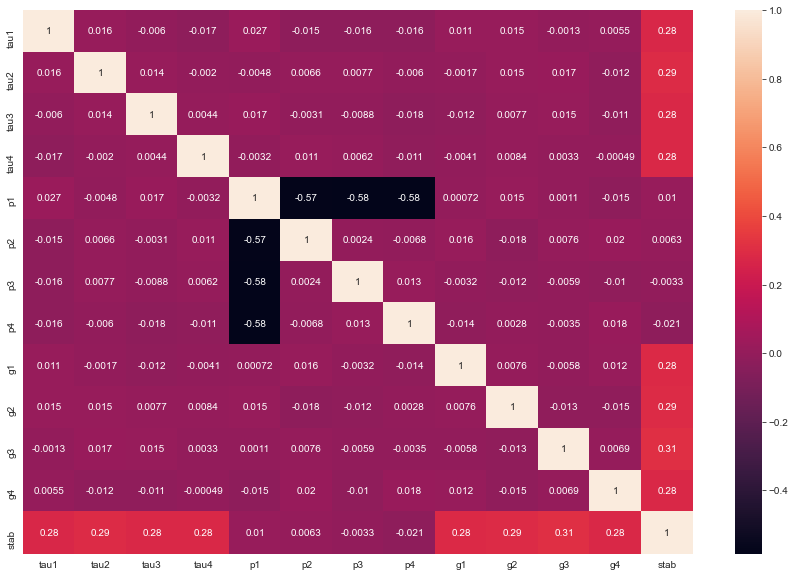

In [5]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot= True)

In [6]:
## Dropping irrelevant features

df.drop("stab", axis= 1, inplace= True)

In [7]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


# Spliting the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("stabf", axis= 1)
y = df["stabf"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train = pd.DataFrame(X_train, columns= df.columns[: -1])
X_test = pd.DataFrame(X_test, columns= df.columns[: -1])

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_mod = LogisticRegression(random_state= 1)

log_mod.fit(X_train, y_train)
log_pred = log_mod.predict(X_test)

## Misclassification
count_misclassified = (y_test != log_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

print(confusion_matrix(y_test, log_pred))
print("===========================================================")
print(classification_report(y_test, log_pred))

Misclassified Samples: 392 

[[ 494  218]
 [ 174 1114]]
              precision    recall  f1-score   support

      stable       0.74      0.69      0.72       712
    unstable       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



In [14]:
log_mod.coef_

array([[ 0.86576062,  0.90758235,  0.8870653 ,  0.9095107 , -0.00723602,
         0.05153914,  0.01248239, -0.05115978,  0.75437344,  0.8365807 ,
         0.86400952,  0.8072807 ]])

# RandomForest 

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 1)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [16]:
## Misclassification
count_misclassified = (y_test != rfc_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

print(confusion_matrix(y_test, rfc_pred))
print("===========================================================")
print(classification_report(y_test, rfc_pred))

Misclassified Samples: 142 

[[ 625   87]
 [  55 1233]]
              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [17]:
## Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rfc_pred) 
print( 'Accuracy: {}' .format(round(accuracy, 4))) 

Accuracy: 0.929


In [18]:
rfc.feature_importances_

array([0.12443249, 0.12630692, 0.12205746, 0.12140145, 0.02913227,
       0.03141126, 0.02995574, 0.02947469, 0.09076479, 0.09768941,
       0.1003254 , 0.09704814])

In [19]:
pd.DataFrame(rfc.feature_importances_, df.columns[: -1], columns = ["RandomForest Coefficients"])

,RandomForest Coefficients
tau1,0.124432
tau2,0.126307
tau3,0.122057
tau4,0.121401
p1,0.029132
p2,0.031411
p3,0.029956
p4,0.029475
g1,0.090765
g2,0.097689


# Extra-Trees

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier(random_state= 1)

tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

## Misclassification
count_misclassified = (y_test != tree_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

print(confusion_matrix(y_test, tree_pred))
print("===========================================================")
print(classification_report(y_test, tree_pred))

Misclassified Samples: 144 

[[ 606  106]
 [  38 1250]]
              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [21]:
tree.feature_importances_

array([0.11739736, 0.11844468, 0.11316851, 0.11546569, 0.03950675,
       0.04037132, 0.04070628, 0.04057864, 0.08978291, 0.09367636,
       0.09688268, 0.09401882])

In [22]:
pd.DataFrame(tree.feature_importances_, df.columns[: -1], columns = ["Tree Coeff"])

,Tree Coeff
tau1,0.117397
tau2,0.118445
tau3,0.113169
tau4,0.115466
p1,0.039507
p2,0.040371
p3,0.040706
p4,0.040579
g1,0.089783
g2,0.093676


### Modifying the Extra tree Classifier

In [23]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 


hyperparameter_grid = {
     'n_estimators': n_estimators,
     'min_samples_leaf': min_samples_leaf,
     'min_samples_split': min_samples_split,
     'max_features': max_features
}

In [24]:
mod_tree = ExtraTreesClassifier(random_state= 1)

In [25]:
from sklearn.model_selection import RandomizedSearchCV

ran_search = RandomizedSearchCV(mod_tree, param_distributions= hyperparameter_grid, n_iter= 5, random_state = 1, 
                                scoring= "roc_auc", n_jobs= -1, cv = 5, verbose= 3 )

In [26]:
ran_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.0s finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='roc_auc', verbose=3)

In [27]:
mod_tree = ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=5, random_state= 1, n_estimators=300)

mod_tree.fit(X_train, y_train)
mod_tree_pred = mod_tree.predict(X_test)

## Misclassification
count_misclassified = (y_test != mod_tree_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

## Evaluation
print(confusion_matrix(y_test, mod_tree_pred))
print("===========================================================")
print(classification_report(y_test, mod_tree_pred))

Misclassified Samples: 142 

[[ 586  126]
 [  16 1272]]
              precision    recall  f1-score   support

      stable       0.97      0.82      0.89       712
    unstable       0.91      0.99      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.94      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [28]:
## Accuracy

accuracy = accuracy_score(y_true=y_test, y_pred=tree_pred) 
print( 'Accuracy: {}' .format(round(accuracy, 4))) 

Accuracy: 0.928


In [29]:
mod_tree.feature_importances_

array([0.12699516, 0.1303115 , 0.12298253, 0.12529795, 0.02419102,
       0.02729649, 0.02771821, 0.02748385, 0.09073072, 0.0985833 ,
       0.10101648, 0.09739282])

In [30]:
pf = pd.DataFrame(mod_tree.feature_importances_, df.columns[: -1], columns = ["Mod_Tree Coeff"])

In [31]:
pf["Mod_Tree Coeff"].sort_values()

p1      0.024191
p2      0.027296
p4      0.027484
p3      0.027718
g1      0.090731
g4      0.097393
g2      0.098583
g3      0.101016
tau3    0.122983
tau4    0.125298
tau1    0.126995
tau2    0.130311
Name: Mod_Tree Coeff, dtype: float64

In [32]:
## Another modification

In [33]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 


hyperparameter_grid = {
     'n_estimators': n_estimators,
     'min_samples_leaf': min_samples_leaf,
     'min_samples_split': min_samples_split,
     'max_features': max_features
}

In [34]:
mod_tree = ExtraTreesClassifier(random_state= 1)

In [35]:
ran_search = RandomizedSearchCV(mod_tree, param_distributions= hyperparameter_grid, n_iter= 10,
                                scoring= "accuracy", n_jobs= -1, cv = 5, verbose= 1, random_state= 1 )

ran_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [36]:
ran_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [37]:
ran_search.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [38]:
model = ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)
model.fit(X_train, y_train)

pre = model.predict(X_test)

In [39]:
## Accuracy

accuracy = accuracy_score(y_true=y_test, y_pred=pre) 
print( 'Accuracy: {}' .format(round(accuracy, 4))) 

Accuracy: 0.927


# XGBoost

In [40]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [41]:
## Hyperpareameter optimization

params = {
    "learning_rate"                  : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 
    "max_depth"                      : [3, 4, 5, 6, 8, 10, 12, 15], 
    "min_child_weight"               : [1, 3, 5, 7], 
    "gamma"                          : [0, 0.1, 0.2, 0.3, 0.4], 
}

In [42]:
classifier = xgb.XGBClassifier(random_state=1)

In [43]:
rand_search = RandomizedSearchCV(classifier, param_distributions= params, random_state=1, n_iter= 5, scoring= "roc_auc", 
                                n_jobs= -1, cv = 5, verbose= 3)

In [44]:
## Creating a timer for the above algorirthm 

from datetime import datetime

def timer(start_time = None):
    
    if not start_time: 
        start_time = datetime.now()
        return start_time
    
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time Taken: %i hours %i mins %s seconds" % (thour, tmin, round(tsec, 2)))

In [45]:
## Here we go
start_time = timer(None)
rand_search.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   49.8s finished



 Time Taken: 0 hours 0 mins 54.68 seconds


In [46]:
rand_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
rand_search.best_params_

{'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0.3}

In [48]:
############ XGBoost Classifier

classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=7,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
classifier.fit(X_train, y_train)
classifier_pred = classifier.predict(X_test)

## Misclassification
count_misclassified = (y_test != classifier_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

## Evaluation
print(confusion_matrix(y_test, classifier_pred))
print("===========================================================")
print(classification_report(y_test, classifier_pred))

Misclassified Samples: 109 

[[ 655   57]
 [  52 1236]]
              precision    recall  f1-score   support

      stable       0.93      0.92      0.92       712
    unstable       0.96      0.96      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [50]:
## Accuracy

accuracy = accuracy_score(y_true=y_test, y_pred=classifier_pred) 
print( 'Accuracy: {}' .format(round(accuracy, 4))) 

Accuracy: 0.9455


# LightGBM

In [51]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [52]:
model = LGBMClassifier(random_state= 1)
model.fit(X_train, y_train)

# make a single prediction
predict = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predict) 
print( 'Accuracy: {}' .format(round(accuracy, 2))) 

Accuracy: 0.94


In [54]:
## Misclassification
count_misclassified = (y_test != predict).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

## Evaluation
print(confusion_matrix(y_test, predict))
print("===========================================================")
print(classification_report(y_test, predict))

Misclassified Samples: 125 

[[ 635   77]
 [  48 1240]]
              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [55]:
## Accuracy

accuracy = accuracy_score(y_true=y_test, y_pred=predict) 
print( 'Accuracy: {}' .format(round(accuracy, 4))) 

Accuracy: 0.9375


# Support Vector Machine

In [56]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)
dec_pred = dec_tree.predict(X_test)

## Misclassification
count_misclassified = (y_test != dec_pred).sum()
print("Misclassified Samples: {}" . format(count_misclassified), "\n")

## Evaluation
print(confusion_matrix(y_test, dec_pred))
print("===========================================================")
print(classification_report(y_test, dec_pred))

Misclassified Samples: 290 

[[ 577  135]
 [ 155 1133]]
              precision    recall  f1-score   support

      stable       0.79      0.81      0.80       712
    unstable       0.89      0.88      0.89      1288

    accuracy                           0.85      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.86      0.85      0.86      2000

